# Punto 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brownian_motion as bm 
from scipy.stats import jarque_bera
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime



In [2]:
#Función de plot:
def plotear(nombre_proceso,time, mu_teor_t,mu_hat_t, var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,1]):
    """
    Plotear comparaciones de vector de medias y varianzas teóricas y empíricas
    """
    fig = plt.figure(figsize=(15, 7))
    # paths
    title = f"Comparación media teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 1)
    plt.plot(time, np.array([mu_teor_t,mu_hat_t]).T)
    plt.legend(["media teórica","media empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    #correlation
    title = f"Comparación varianza teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 2)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array([var_teor_t,var_hat_t]).T)
    plt.legend(["varianza teórica","varianza empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


    plt.subplot(2, 2, 3)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(mu_error).T)
    plt.legend(["Error en media simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(2, 2, 4)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(var_error).T)
    plt.legend(["Error en varianza simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

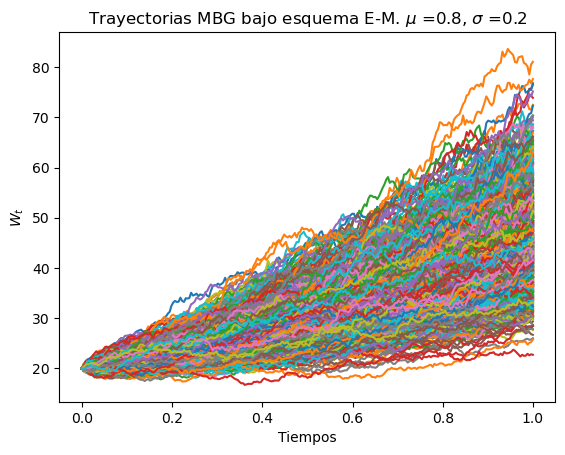

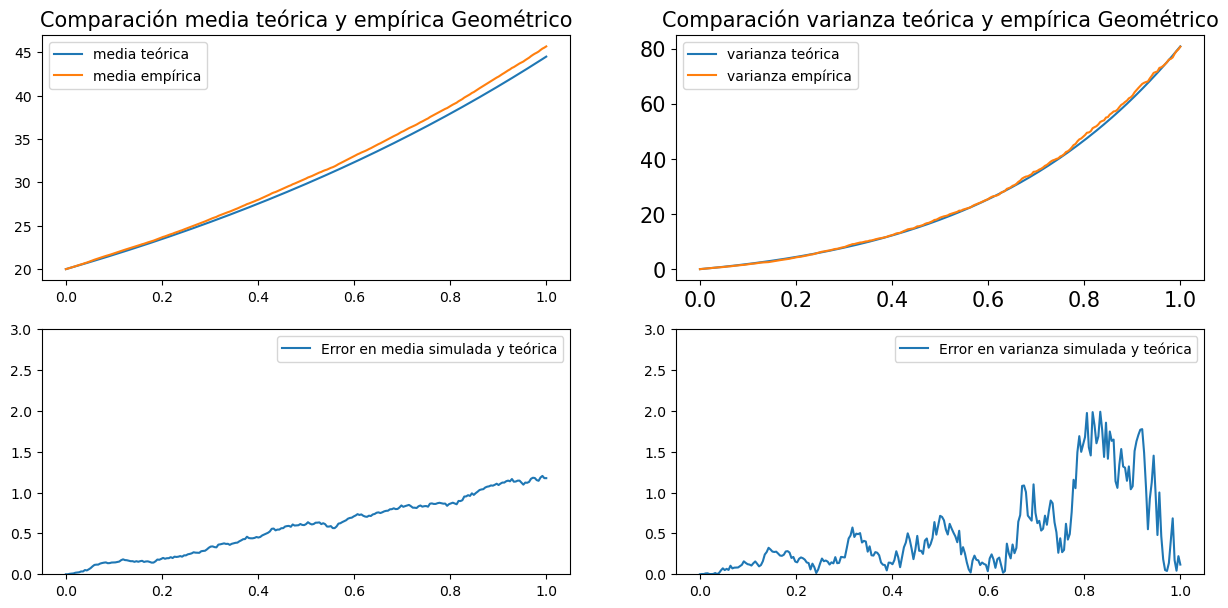

In [3]:
#Numeral 2
T=1
n=253
d=1000
time=np.linspace(0,T,n)
dt=T/(n-1)
G_0=20
mu=0.8
sigma=0.2

#G=bm.EM_geom_brown(G_0,mu,sigma,n,d,dt=dt)
G=bm.get_geometr_matr(G_0,n,d,mu,sigma,T)


fig, ax = plt.subplots()
ax.plot(time,G.T)
ax.set_title(f"Trayectorias MBG bajo esquema E-M. $\mu$ ={mu}, $\sigma$ ={sigma}")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 

mu_teor_t,cov_teor=bm.geometric_theoret_mu_cov(G_0,time,alpha=mu-sigma**2/2,lamda=sigma)
mu_hat_t,cov_hat=bm.empiric_mu_cov(G)

var_hat_t=np.diag(cov_hat)
var_teor_t=np.diag(cov_teor)

mu_error=bm.error(mu_hat_t,mu_teor_t)
var_error=bm.error(var_hat_t,var_teor_t)

plotear("Geométrico",time, mu_teor_t,mu_hat_t,var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,3])


In [82]:
##Tomado de https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/
from numpy.random import randn

def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0


# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
# gbm = np.log(np.cumsum(np.random.randn(100000))+1000)
# mr = np.log(np.random.randn(100000)+1000)
# tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)
# print(tr)
# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
# print("Hurst(GBM):   %s" % hurst(gbm))
# print("Hurst(MR):    %s" % hurst(mr))
# print("Hurst(TR):    %s" % hurst(tr))

# # Assuming you have run the above code to obtain 'goog'!
# print("Hurst(GOOG):  %s" % hurst(goog['Adj Close'].values))
v_hurst=[]
for i in range(2000):
    v_hurst.append(hurst(G[i]))
print(np.mean(v_hurst))

0.3782850727068223


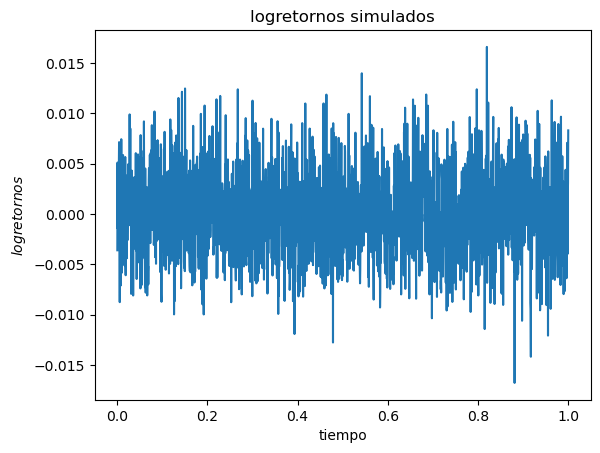

(array([ 3.,  1.,  6.,  4.,  6.,  0.,  3.,  3.,  4.,  2.,  4., 10.,  5.,
         3.,  3.,  2.,  7.,  0.,  1.,  5.,  5.,  2.,  4.,  2.,  1.,  3.,
         0.,  3.,  5.,  3.]),
 array([0.00477464, 0.03785739, 0.07094013, 0.10402288, 0.13710562,
        0.17018837, 0.20327112, 0.23635386, 0.26943661, 0.30251935,
        0.3356021 , 0.36868485, 0.40176759, 0.43485034, 0.46793308,
        0.50101583, 0.53409858, 0.56718132, 0.60026407, 0.63334681,
        0.66642956, 0.69951231, 0.73259505, 0.7656778 , 0.79876054,
        0.83184329, 0.86492604, 0.89800878, 0.93109153, 0.96417427,
        0.99725702]),
 <BarContainer object of 30 artists>)

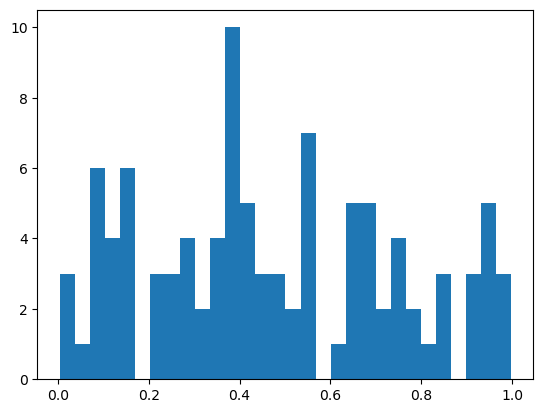

In [119]:
log_retG=np.diff(np.log(G),axis=1)
perc_retG=np.diff(G)/G[:,:-1]


fig, ax = plt.subplots()
ax.plot(time[1:],log_retG[1].T)
ax.set_title("logretornos simulados")
ax.set_xlabel("tiempo")
ax.set_ylabel("$log retornos$")
plt.show() 
#sm.qqplot(perc_retG[10],line="45")
test=[]
for i in range(d):
    test.append(jarque_bera(log_retG[i]).pvalue)
plt.hist(test,bins=30)

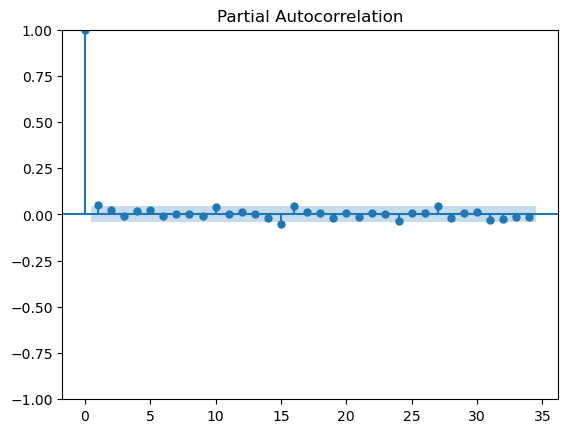

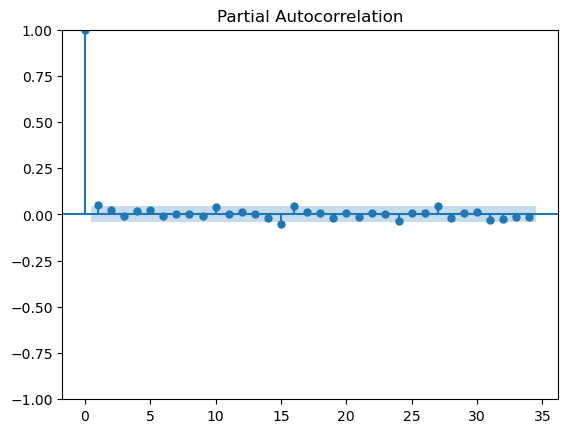

In [127]:
plot_pacf(log_retG[5])

In [287]:
yf.pdr_override()
inicio=datetime(2020,1,1)
fin=datetime(2023,10,1)
data=pdr.get_data_yahoo("DE",inicio,fin)
data.drop(["Open","Adj Close","Volume"],axis=1,inplace=True)
#Incluyo retornos R y log retornos ln(1+R)
data["Gross_ret"]=data["Close"].pct_change()
data["Log_ret"]=np.log1p(data["Gross_ret"])
data



[*********************100%%**********************]  1 of 1 completed


,High,Low,Close,Gross_ret,Log_ret
Date,,,,,
2020-01-02,176.880005,173.729996,176.860001,NaN,NaN
2020-01-03,175.759995,173.550003,175.550003,-0.007407,-0.007435
2020-01-06,176.880005,173.740005,176.809998,0.007177,0.007152
2020-01-07,176.440002,173.490005,173.740005,-0.017363,-0.017516
2020-01-08,176.779999,173.990005,175.899994,0.012432,0.012356
...,...,...,...,...,...
2023-09-25,385.209991,378.359985,384.390015,0.009242,0.009200
2023-09-26,381.869995,377.239990,379.630005,-0.012383,-0.012461
2023-09-27,386.359985,380.269989,384.359985,0.012459,0.012382


<Axes: xlabel='Date'>

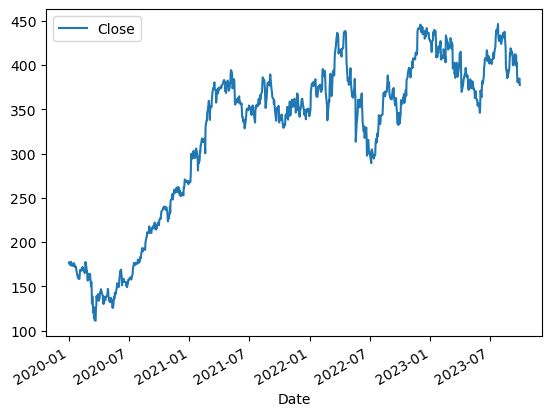

In [288]:
data[["Close"]].plot()

In [289]:
newdata=data.loc["2021-01":"2022-01"]
newdata

,High,Low,Close,Gross_ret,Log_ret
Date,,,,,
2021-01-04,273.750000,263.850006,267.640015,-0.005241,-0.005254
2021-01-05,274.760010,267.450012,274.279999,0.024809,0.024507
2021-01-06,292.839996,274.649994,290.359985,0.058626,0.056972
2021-01-07,300.559998,293.489990,299.730011,0.032270,0.031761
2021-01-08,300.480011,290.390015,293.910004,-0.019417,-0.019608
...,...,...,...,...,...
2022-01-25,370.260010,350.799988,368.220001,0.011510,0.011444
2022-01-26,380.790009,366.540009,372.239990,0.010917,0.010858
2022-01-27,382.880005,370.450012,375.959991,0.009994,0.009944


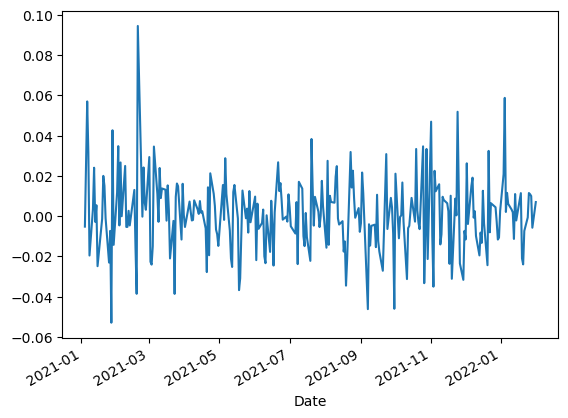

In [294]:
newdata["Log_ret"].plot()
data_values=newdata["Close"].values
data_log_ret=newdata["Log_ret"].values
data_R=newdata["Gross_ret"].values

SignificanceResult(statistic=75.32963706452279, pvalue=4.389116915437597e-17)

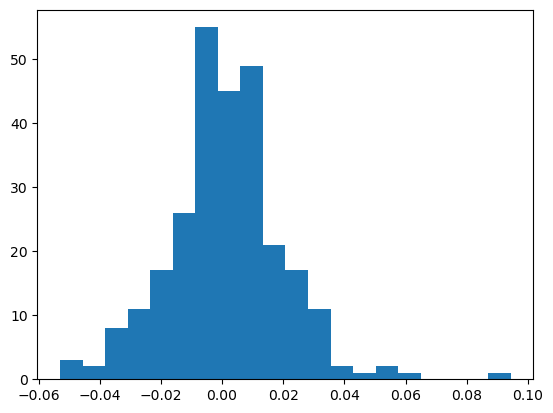

In [291]:
#hurst(newdata["Close"].values)
plt.hist(data_log_ret,bins=20)
jarque_bera(data_log_ret)


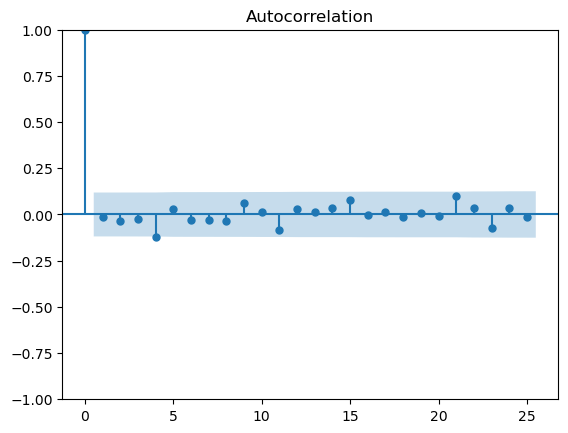

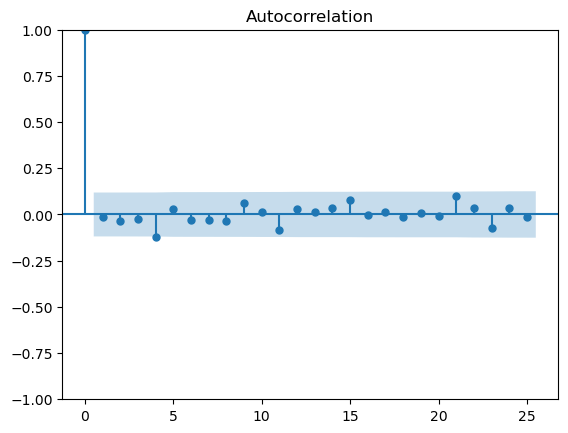

In [187]:
plot_acf(data_log_ret)

In [304]:
#Estimación
mu_hat=(1/dt)*np.mean(data_R)
sigma_hat=np.sqrt((1/dt)*np.var(data_R))
mu_hat,sigma_hat
n=20
d=1000
G_0=newdata["Close"][-1]

#G=bm.EM_geom_brown(G_0,mu,sigma,n,d,dt=dt)
G=bm.get_geometr_matr(G_0,n,d,(mu_hat-sigma**2/2),sigma_hat,T)
#Estimación y bandas
estim=np.mean(G,axis=0)
desv=np.std(G,axis=0)
banda_sup=estim+1.95*desv
banda_inf=estim-1.95*desv

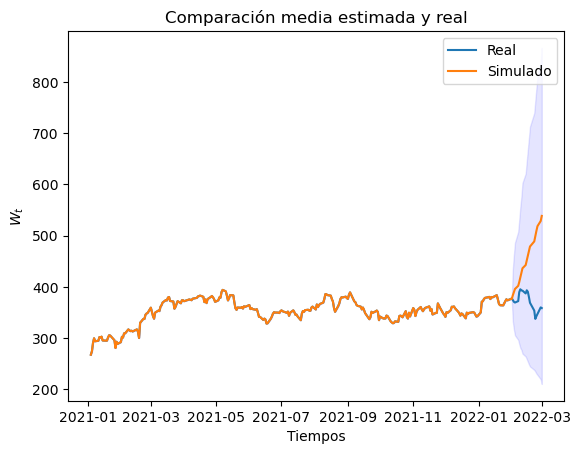

In [305]:
testdata=(data.loc["2022-02":"2022-03-01"]) #20 datos adicionales
complete_data=data.loc["2021-01":"2022-03-01"]
t=complete_data.index
datostotales=complete_data["Close"].values

estim_compl=np.concatenate((data_values,estim))
simulated=np.concatenate((np.tile(data_values,(d,1)),G),axis=1)#tile hace una matriz con cada fila igual al vector
banda_sup_compl=np.concatenate((data_values,banda_sup))
banda_inf_compl=np.concatenate((data_values,banda_inf))

fig, ax = plt.subplots()
ax.plot(t,np.array([datostotales,estim_compl]).T)
plt.legend(["Real","Simulado"])
plt.fill_between(t, banda_inf_compl, banda_sup_compl, color='blue', alpha=0.1)
ax.set_title(f"Comparación media estimada y real")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 


In [283]:
complete_data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', length=292, freq=None)

In [242]:
np.tile(newdata,)

,High,Low,Close,Gross_ret,Log_ret
Date,,,,,
2021-01-04,273.750000,263.850006,267.640015,-0.005241,-0.005254
2021-01-05,274.760010,267.450012,274.279999,0.024809,0.024507
2021-01-06,292.839996,274.649994,290.359985,0.058626,0.056972
2021-01-07,300.559998,293.489990,299.730011,0.032270,0.031761
2021-01-08,300.480011,290.390015,293.910004,-0.019417,-0.019608
...,...,...,...,...,...
2022-01-25,370.260010,350.799988,368.220001,0.011510,0.011444
2022-01-26,380.790009,366.540009,372.239990,0.010917,0.010858
2022-01-27,382.880005,370.450012,375.959991,0.009994,0.009944


In [240]:
a=np.array([1,2,3,4,5,6,7])
b=np.array([[2,3,4,5,6,7],[2,3,4,5,6,4]])
c=np.tile(a,(2,1))
np.concatenate((c,b),axis=1)

array([[1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 4]])